<h2>Download the xverse</h2>

In [54]:
!pip -qq install xverse

<h2>Import Neccesary Packages</h2>

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
from sklearn.metrics import accuracy_score
%matplotlib inline

<h2>Load the dataset</h2>

In [131]:
# Step 2: Load the dataset
# Replace with your actual dataset file name/path
df = pd.read_csv("GiveMeSomeCredit.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)

# Display first 5 rows
df.head()


✅ Dataset Loaded Successfully!
Shape of dataset: (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<h3>Describe the all statistical properties of the train dataset</h3>

In [133]:
# Step 3: Describe statistical properties of the dataset
print("\n📊 Statistical Summary:")
df.describe(include="all")



📊 Statistical Summary:


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [135]:
# Additional info about datatypes & missing values
print("\n Dataset Info:")
df.info()



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-nul

<h2>Pre-processing</h2>
<h3>Remove unwanted columns</h3>

In [137]:
# Step 4: Pre-processing
# Drop unwanted index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("\n✅ Columns after preprocessing:")
print(df.columns.tolist())



✅ Columns after preprocessing:
['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<h2>Handle the missing data</h2>
<h3>Find the how many null values in the dataset and fill with mean or remove</h3>.

In [139]:
# Step 5: Handle Missing Data

# Check total missing values in each column
print("🔍 Missing Values in Dataset:\n")
print(df.isnull().sum())

# Option 1: Fill missing values with column mean (for numerical features)
df_filled = df.fillna(df.mean(numeric_only=True))

# Option 2 (alternative): Drop rows with missing values
# df_cleaned = df.dropna()

print("\n✅ Missing values handled! (Filled with mean)")
print("Remaining nulls:\n", df_filled.isnull().sum())


🔍 Missing Values in Dataset:

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

✅ Missing values handled! (Filled with mean)
Remaining nulls:
 SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfT

<h2>EDA & Visualization</h2>
<h3>Calculate the percentage of the target lebels and visualize with a graph</h3>

📊 Percentage of Target Labels:

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64


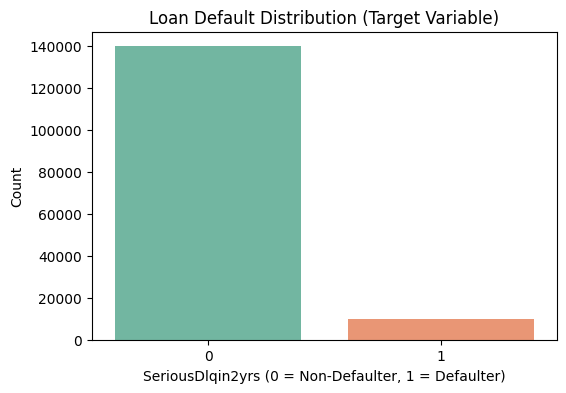

In [141]:
# Step 6: EDA - Analyze Target Variable (SeriousDlqin2yrs)

# Calculate the percentage of target labels (0 = No Default, 1 = Default)
target_counts = df_filled['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
print("📊 Percentage of Target Labels:\n")
print(target_counts)

# Plot the distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='SeriousDlqin2yrs', data=df_filled, hue='SeriousDlqin2yrs', palette='Set2', legend=False)
plt.title("Loan Default Distribution (Target Variable)")
plt.xlabel("SeriousDlqin2yrs (0 = Non-Defaulter, 1 = Defaulter)")
plt.ylabel("Count")
plt.show()


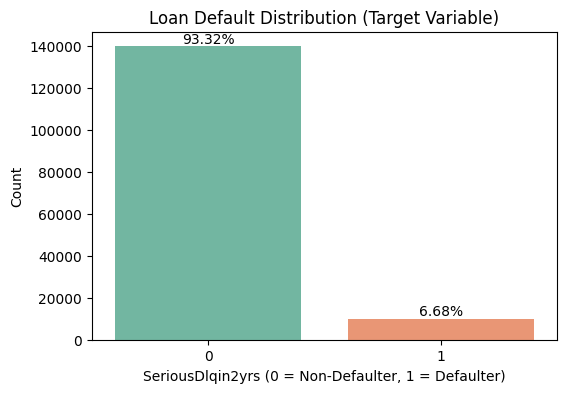

In [143]:
# 📊 Distribution of Loan Defaults with Percentages
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x='SeriousDlqin2yrs', 
    data=df_filled, 
    hue='SeriousDlqin2yrs',   
    palette='Set2', 
    legend=False
)

# Add percentage labels on bars
total = len(df_filled)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count/total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Loan Default Distribution (Target Variable)")
plt.xlabel("SeriousDlqin2yrs (0 = Non-Defaulter, 1 = Defaulter)")
plt.ylabel("Count")
plt.show()


<h3>Plot the distribution of SeriousDlqin2yrs by age</h>

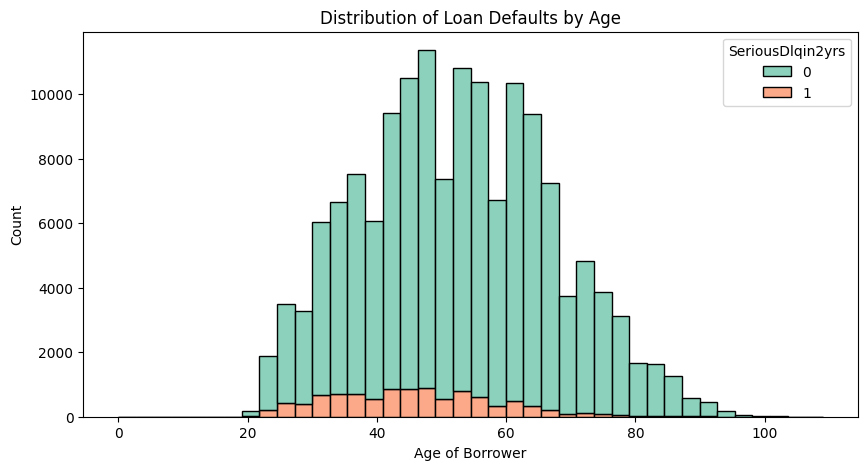

In [145]:
# 📊 Distribution of SeriousDlqin2yrs by Age
plt.figure(figsize=(10,5))
sns.histplot(
    data=df_filled,
    x='age',
    hue='SeriousDlqin2yrs',   # separate colors for defaulters & non-defaulters
    multiple='stack',
    palette='Set2',
    bins=40
)

plt.title("Distribution of Loan Defaults by Age")
plt.xlabel("Age of Borrower")
plt.ylabel("Count")
plt.show()


<h3>Calculate the correlation and plot the heatmap</h3>



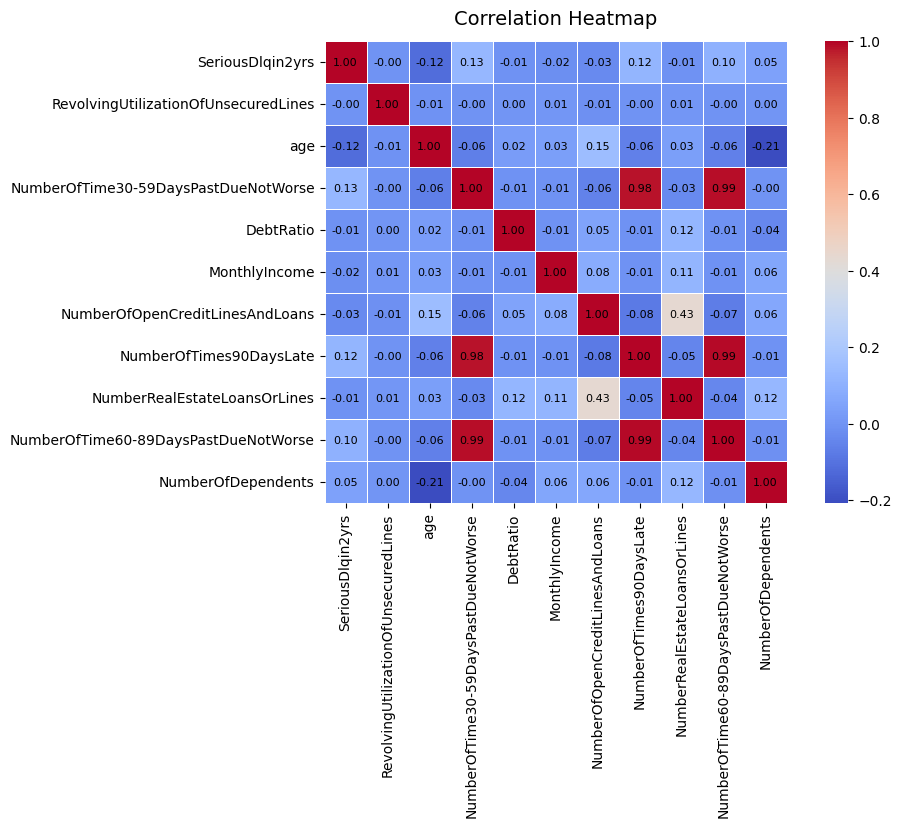

In [147]:

# Compute correlation matrix
corr = df_filled.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,          # ✅ show numbers inside boxes
    fmt=".2f",           # ✅ format numbers to 2 decimals
    cmap="coolwarm",     # color map
    cbar=True,           # show color bar
    square=True,         # square boxes
    linewidths=0.5,      # space between boxes
    annot_kws={"size": 8, "color": "black"}  # smaller readable numbers
)
plt.title("Correlation Heatmap", fontsize=14, pad=12)
plt.show()


<h3>Data Engineering</h3>


In [153]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Example: binning 'age' into 5 bins using quantile strategy
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Fit and transform
X_binned = kb.fit_transform(X[['age']])

# Add binned column back to DataFrame
X['age_binned'] = X_binned

# Check first few values
print(X[['age', 'age_binned']].head(10))


   age  age_binned
0   45         1.0
1   40         1.0
2   38         0.0
3   30         0.0
4   49         2.0
5   74         4.0
6   57         3.0
7   39         1.0
8   27         0.0
9   57         3.0


<h3>Identify features, target and split it into train and test</h3>

In [155]:
# Use the dataset that still contains the target column
target = "SeriousDlqin2yrs"

# ✅ Make sure target exists
print("Columns in current dataframe:", df_filled.columns.tolist())

# Separate features and target
X = df_filled.drop(columns=[target])   # Features
y = df_filled[target]                  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Data successfully split!")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in training set:")
print(y_train.value_counts(normalize=True))


Columns in current dataframe: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
✅ Data successfully split!
Training set shape: (105000, 10)
Test set shape: (45000, 10)
Target distribution in training set:
SeriousDlqin2yrs
0    0.933162
1    0.066838
Name: proportion, dtype: float64


<h3>Logistic Regression from scratch using gradient method</h3>

In [157]:
import numpy as np

# ---------------------------
# 1. Define sigmoid function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# 2. Logistic Regression model from scratch
# ---------------------------
def logistic_regression_scratch(X, y, lr=0.01, epochs=1000):
    m, n = X.shape  # m = samples, n = features
    
    # Initialize weights & bias
    w = np.zeros(n)
    b = 0

    
    # Gradient Descent
    losses = []
    for i in range(epochs):
        # Linear function
        z = np.dot(X, w) + b
        # Sigmoid activation
        y_hat = sigmoid(z)
        
        # Compute loss (binary cross-entropy)
        loss = -(1/m) * np.sum(y*np.log(y_hat + 1e-9) + (1-y)*np.log(1-y_hat + 1e-9))
        losses.append(loss)
        
        # Gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)
        
        # Update weights
        w -= lr * dw
        b -= lr * db
        
        # Print loss every 100 steps
        if i % 100 == 0:
            print(f"Epoch {i} | Loss: {loss:.4f}")
    
    return w, b, losses

# ---------------------------
# 3. Prediction Function
# ---------------------------
def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return (y_hat >= threshold).astype(int)

# ---------------------------
# Example Usage
# ---------------------------
# Suppose we already have: X_train, y_train, X_test, y_test
# (make sure X is normalized and y is in {0,1})

w, b, losses = logistic_regression_scratch(X_train.values, y_train.values, lr=0.01, epochs=1000)

# Predictions
y_pred = predict(X_test.values, w, b)

# Accuracy
accuracy = np.mean(y_pred == y_test.values)
print("✅ Accuracy from scratch:", accuracy)


Epoch 0 | Loss: 0.6931


C:\Users\ganes\AppData\Local\Temp\ipykernel_13000\3274273040.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 100 | Loss: 1.3849
Epoch 200 | Loss: 1.3849
Epoch 300 | Loss: 1.3852
Epoch 400 | Loss: 1.3900
Epoch 500 | Loss: 1.3870
Epoch 600 | Loss: 1.3853
Epoch 700 | Loss: 1.3849
Epoch 800 | Loss: 1.3848
Epoch 900 | Loss: 1.3849
✅ Accuracy from scratch: 0.07726666666666666


In [176]:
import numpy as np

# -----------------------------
# 1. Stable Sigmoid Function
# -----------------------------
def sigmoid(z):
    """
    Fully stable sigmoid function to avoid overflow
    """
    # Clip z to avoid extreme values
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# -----------------------------
# 2. Binary Cross-Entropy Loss
# -----------------------------
def compute_loss(y, y_hat):
    """
    Binary cross-entropy loss with numerical stability
    """
    eps = 1e-10
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# -----------------------------
# 3. Logistic Regression Training
# -----------------------------
def logistic_regression(X, y, lr=0.001, epochs=1000):
    """
    Train logistic regression using gradient descent
    """
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    loss_history = []

    for epoch in range(epochs + 1):
        # Linear prediction
        z = np.dot(X, weights) + bias
        # Apply stable sigmoid
        y_hat = sigmoid(z)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        # Compute and store loss
        loss = compute_loss(y, y_hat)
        loss_history.append(loss)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch} | Loss: {loss:.6f}")

    return weights, bias, loss_history

# -----------------------------
# 4. Prediction Function
# -----------------------------
def predict(X, weights, bias, threshold=0.5):
    """
    Predict binary labels
    """
    z = np.dot(X, weights) + bias
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

# -----------------------------
# 5. Example Usage
# -----------------------------
# Ensure X_train, X_test, y_train, y_test are numpy arrays
# Optional: scale features for better convergence
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Training
weights, bias, loss_history = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

# Prediction & Accuracy
y_pred = predict(X_test, weights, bias)
accuracy = np.mean(y_pred == y_test)
print(f"\n✅ Accuracy from scratch: {accuracy:.4f}")


Epoch 0 | Loss: 0.693147
Epoch 100 | Loss: 1.538704
Epoch 200 | Loss: 1.538775
Epoch 300 | Loss: 1.539012
Epoch 400 | Loss: 1.543707
Epoch 500 | Loss: 1.540745
Epoch 600 | Loss: 1.539127
Epoch 700 | Loss: 1.538779
Epoch 800 | Loss: 1.538703
Epoch 900 | Loss: 1.538756
Epoch 1000 | Loss: 21.192915

✅ Accuracy from scratch: 0.9331


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class weightage
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)
logreg_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = logreg_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"✅ Accuracy with class weightage: {accuracy_weighted:.4f}")

# Logistic Regression without class weightage
logreg_unweighted = LogisticRegression(class_weight=None, max_iter=5000, random_state=42)
logreg_unweighted.fit(X_train_scaled, y_train)
y_pred_unweighted = logreg_unweighted.predict(X_test_scaled)
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)
print(f"✅ Accuracy without class weightage: {accuracy_unweighted:.4f}")


✅ Accuracy with class weightage: 0.7764
✅ Accuracy without class weightage: 0.9338


<h3>Credit scoring</h3>

In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1. Scaling parameters
# -----------------------------
pdo = 20          # Points to double the odds
odds = 50         # Base odds (reference odds)
round_of_score = 600

factor = pdo / np.log(2)
offset = round_of_score - (factor * np.log(odds))
print("Factor:", factor, "Offset:", offset)

# -----------------------------
# 2. Example WoE Data
# -----------------------------
# Suppose woe_df contains WoE values for each variable and its bins
# Example: 3 variables with 3 bins each
woe_df = pd.DataFrame({
    'Var1': [-0.2, 0.0, 0.3],
    'Var2': [0.1, -0.1, 0.2],
    'Var3': [0.0, 0.2, -0.2]
})
print("\nWoE Table:\n", woe_df)

# -----------------------------
# 3. Example Logistic Regression Model
# -----------------------------
# For demonstration, let's create a dummy trained model
# In practice, use your trained LogisticRegression model
lr_model = LogisticRegression()
# Set coefficients and intercept manually for example
lr_model.coef_ = np.array([[0.5, -0.3, 0.2]])  # shape (1, n_features)
lr_model.intercept_ = np.array([-0.1])          # shape (1,)

# -----------------------------
# 4. Compute variable-level credit scores
# -----------------------------
scores = {}
alpha = lr_model.intercept_[0]

for i, col in enumerate(woe_df.columns):
    beta = lr_model.coef_[0][i]
    woe_values = woe_df[col].values
    # Score for each bin
    score = -(beta * woe_values + alpha) * factor + offset
    scores[col] = score

# Convert to DataFrame for readability
score_df = pd.DataFrame(scores)
print("\nVariable-level Credit Scores:\n", score_df)

# -----------------------------
# 5. Compute total credit score for each sample
# -----------------------------
# Suppose X_woe is the WoE-transformed dataset (rows = samples, cols = variables)
X_woe = np.array([
    [-0.2, 0.1, 0.0],
    [0.0, -0.1, 0.2],
    [0.3, 0.2, -0.2]
])

def calculate_total_score(X_woe, lr_model, factor, offset):
    beta = lr_model.coef_[0]
    alpha = lr_model.intercept_[0]
    total_score = -(np.dot(X_woe, beta) + alpha) * factor + offset
    return total_score

total_scores = calculate_total_score(X_woe, lr_model, factor, offset)
print("\nTotal Credit Scores for Samples:\n", total_scores)


Factor: 28.85390081777927 Offset: 487.1228762045055

WoE Table:
    Var1  Var2  Var3
0  -0.2   0.1   0.0
1   0.0  -0.1   0.2
2   0.3   0.2  -0.2

Variable-level Credit Scores:
          Var1        Var2        Var3
0  492.893656  490.873883  490.008266
1  490.008266  489.142649  488.854110
2  485.680181  491.739500  491.162422

Total Credit Scores for Samples:
 [493.75927339 487.98849323 488.56557125]


<h3>Precision</h3>

In [174]:
from sklearn.metrics import precision_score
# Assumingy_test = true labels, y_pred = predicted labels
precision = precision_score(y_test, y_pred)
print(f"✅ Precision: {precision:.4f}")


✅ Precision: 0.0671


<h3>Recall and Classification Report</h3>

AUC Score: 0.7995

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     41992
           1       0.18      0.66      0.28      3008

    accuracy                           0.78     45000
   macro avg       0.57      0.72      0.58     45000
weighted avg       0.92      0.78      0.83     45000



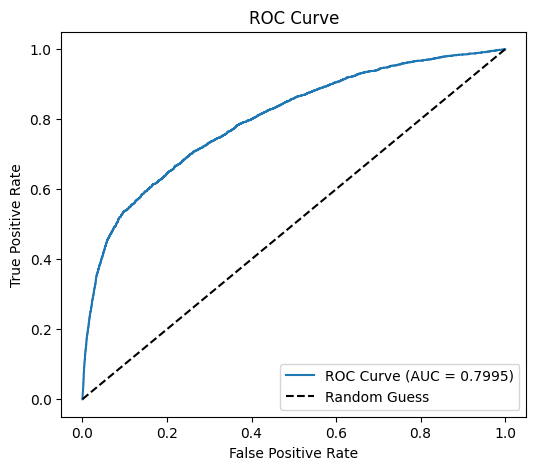

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

# -----------------------------
# 1. Predict probabilities for ROC
# -----------------------------
y_pred_proba = logreg_pipeline.predict_proba(X_test_features)[:, 1]

# -----------------------------
# 2. AUC Score
# -----------------------------
auc_score = roc_auc_score(y_test_target, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# -----------------------------
# 3. Classification Report
# -----------------------------
print("\nClassification Report:\n", classification_report(y_test_target, y_pred))

# -----------------------------
# 4. ROC Curve Plot
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test_target, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


<h3>Confusion matrix</h3>

Confusion Matrix:
 [[  491 41501]
 [   22  2986]]


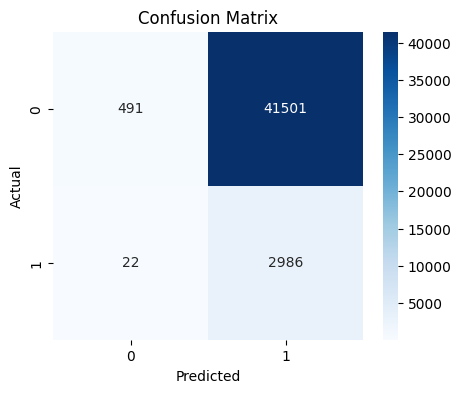

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Visualize as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<h3>Have you tried implementing Logistic regression with normal features instead of WOE ?</h3>


Accuracy: 0.7764
Precision: 0.1799
Recall: 0.6589
F1-score: 0.2826

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     41992
           1       0.18      0.66      0.28      3008

    accuracy                           0.78     45000
   macro avg       0.57      0.72      0.58     45000
weighted avg       0.92      0.78      0.83     45000



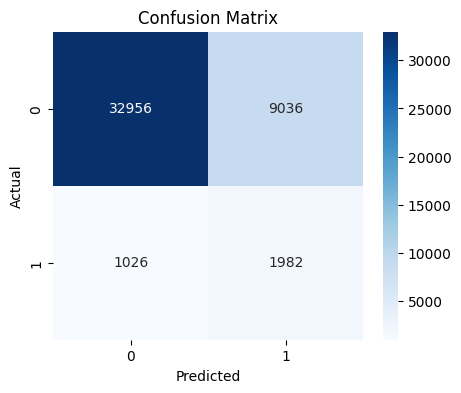

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define features and target
# -----------------------------
numerical_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 
                      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
                      'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
                      'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
                      'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

X_train_features = X_train[numerical_features]
X_test_features = X_test[numerical_features]
y_train_target = y_train
y_test_target = y_test

# -----------------------------
# 2. Pipeline for scaling + Logistic Regression
# -----------------------------
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42))
])

# -----------------------------
# 3. Train the model
# -----------------------------
logreg_pipeline.fit(X_train_features, y_train_target)

# -----------------------------
# 4. Predictions
# -----------------------------
y_pred = logreg_pipeline.predict(X_test_features)

# -----------------------------
# 5. Performance Metrics
# -----------------------------
accuracy = accuracy_score(y_test_target, y_pred)
precision = precision_score(y_test_target, y_pred)
recall = recall_score(y_test_target, y_pred)
f1 = f1_score(y_test_target, y_pred)
cm = confusion_matrix(y_test_target, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test_target, y_pred))

# -----------------------------
# 6. Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




<h4>Comment on the performance of the model with weightage and without weightage</h4>

<h4> Weightage will adjacets for imbalanced classes by giving higher weight to the minority clasess</h4>

<h4>without weightage treats all classes equally but it ignores the imbalanced class</h4>